### **GETTING REQURIED LIBRARIES**

In [ ]:
import math
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### **READING THE DATA SETS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/TASK 7 data set/segmentation data.csv')

In [ ]:
train.dtypes

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

In [ ]:
train.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
train.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


### **CHECKING THE DATA SET**

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
train.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [ ]:
train.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [ ]:
import pandas as pd

for column in train.columns:
    unique_values = train[column].unique()
    length_of_unique_values = len(unique_values)

    print(f"Column '{column}' has {length_of_unique_values} unique values.")

Column 'ID' has 2000 unique values.
Column 'Sex' has 2 unique values.
Column 'Marital status' has 2 unique values.
Column 'Age' has 58 unique values.
Column 'Education' has 4 unique values.
Column 'Income' has 1982 unique values.
Column 'Occupation' has 3 unique values.
Column 'Settlement size' has 3 unique values.


### **COLUMNS OF THE DATA SET**

In [ ]:
train.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

### **CORRELATION MATRIX ***

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb

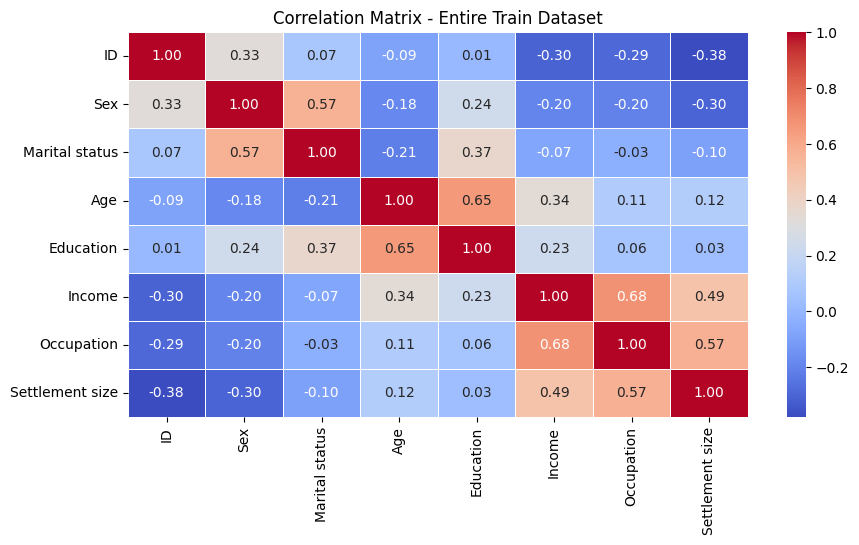

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'train' with your dataset
train = pd.read_csv('/content/drive/MyDrive/TASK 7 data set/segmentation data.csv')

# Calculate the correlation matrix
correlation_matrix = train.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Entire Train Dataset')
plt.show()

In [ ]:
N = 10

# Calculate absolute correlation values for each feature
correlation_values = correlation_matrix.abs()

# Sort the correlation values in descending order
sorted_correlation = correlation_values.unstack().sort_values(ascending=False)

# Exclude self-correlations and duplicate correlations
sorted_correlation = sorted_correlation[sorted_correlation.index.get_level_values(0) != sorted_correlation.index.get_level_values(1)]

# Select the top 10 features with highest absolute correlation values
top_features = sorted_correlation[:N]

print("Top", N, "features based on correlation:")
print(top_features)


Top 10 features based on correlation:
Occupation       Income             0.680357
Income           Occupation         0.680357
Education        Age                0.654605
Age              Education          0.654605
Occupation       Settlement size    0.571795
Settlement size  Occupation         0.571795
Marital status   Sex                0.566511
Sex              Marital status     0.566511
Income           Settlement size    0.490881
Settlement size  Income             0.490881
dtype: float64


### **EDA**

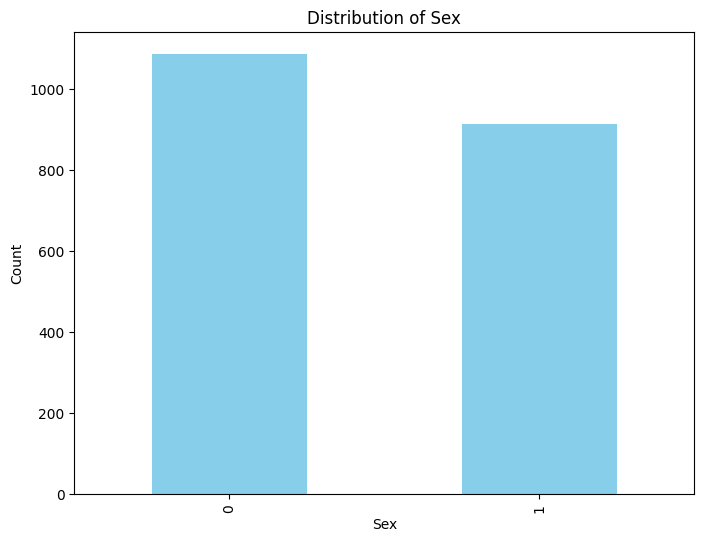

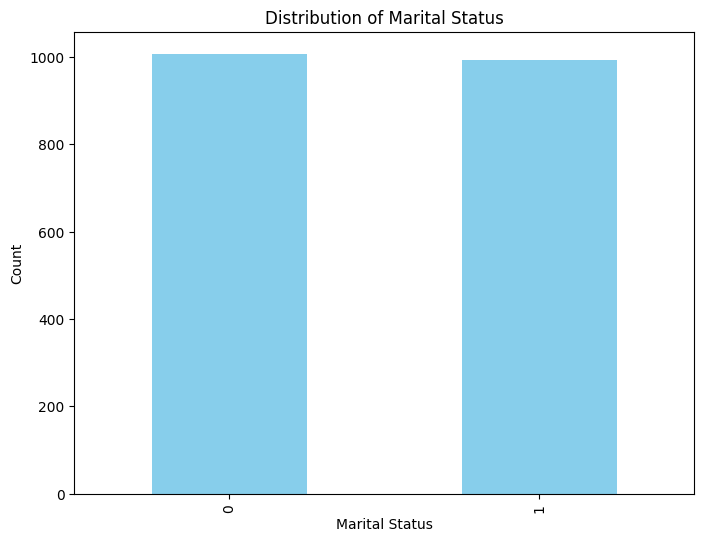

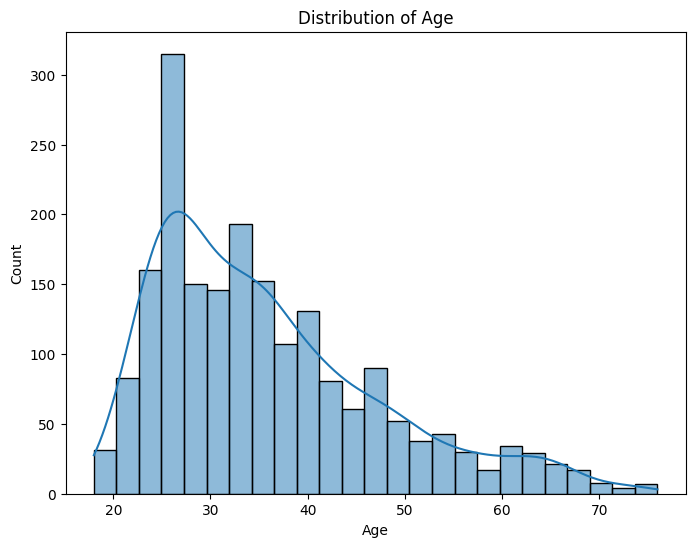

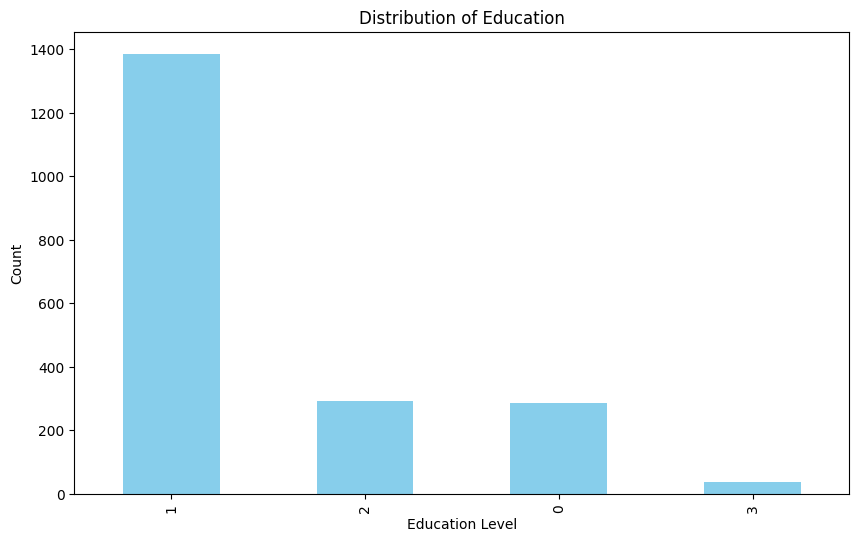

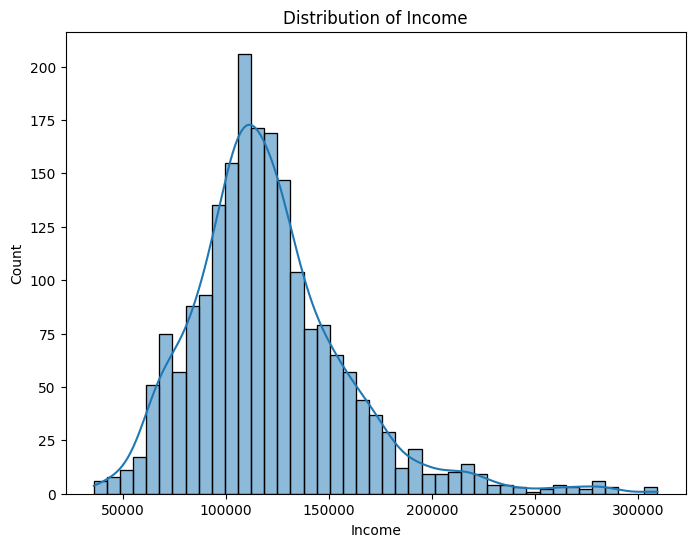

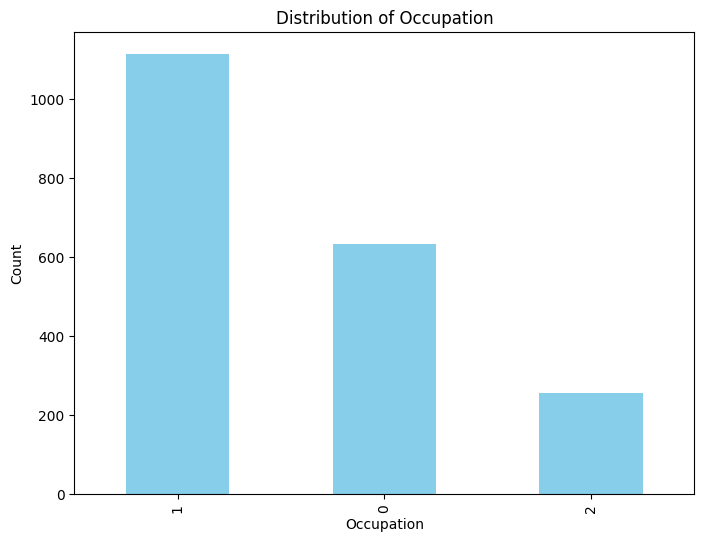

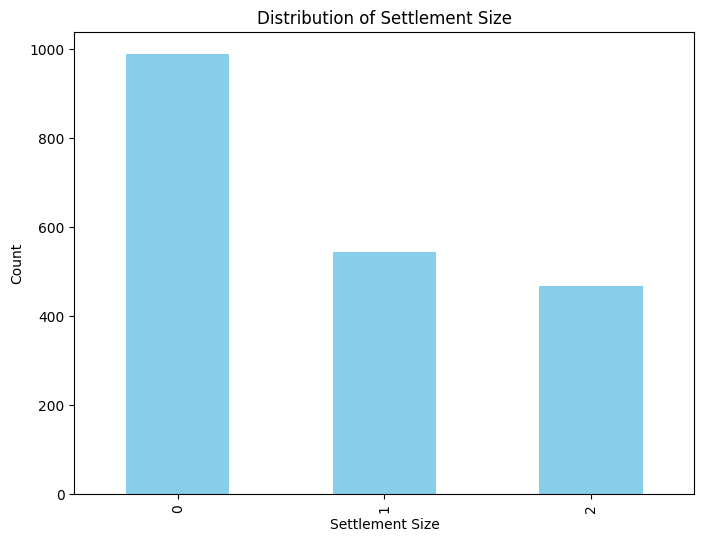

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' is your DataFrame with the dataset
# Replace 'your_dataset.csv' with the actual file or load the dataset using another method
# train = pd.read_csv('your_dataset.csv')


# Sex
plt.figure(figsize=(8, 6))
train['Sex'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Marital status
plt.figure(figsize=(8, 6))
train['Marital status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Age
plt.figure(figsize=(8, 6))
sns.histplot(train['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Education
plt.figure(figsize=(10, 6))
train['Education'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Income
plt.figure(figsize=(8, 6))
sns.histplot(train['Income'], kde=True)
plt.title('Distribution of Income')
plt.show()

# Occupation
plt.figure(figsize=(8, 6))
train['Occupation'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

# Settlement Size
plt.figure(figsize=(8, 6))
train['Settlement size'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Settlement Size')
plt.xlabel('Settlement Size')
plt.ylabel('Count')
plt.show()


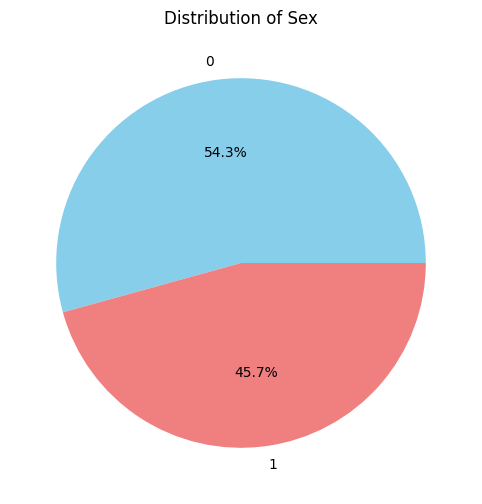

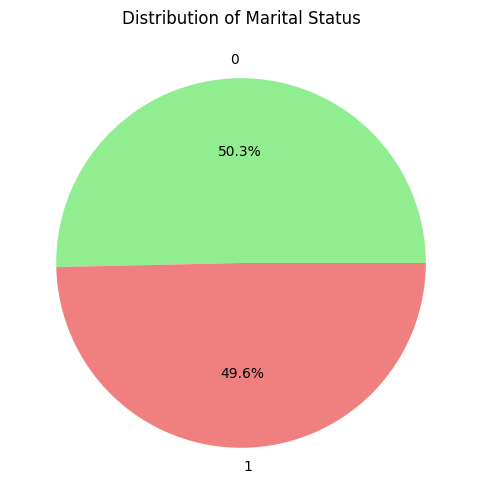

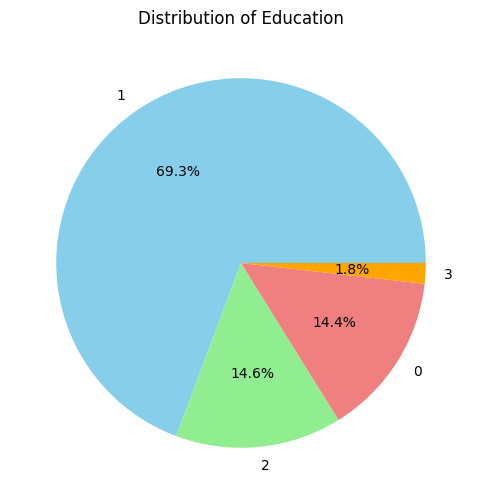

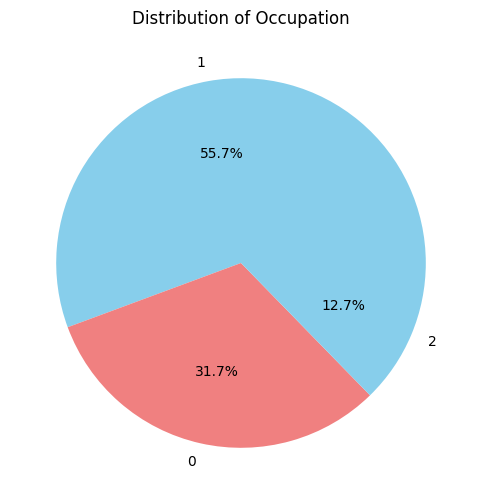

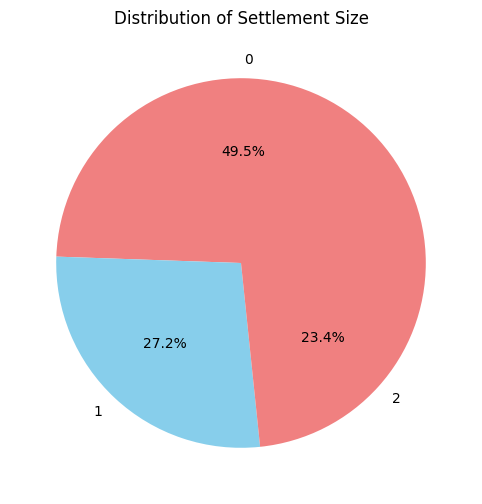

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame with the dataset
# Replace 'your_dataset.csv' with the actual file or load the dataset using another method
# train = pd.read_csv('your_dataset.csv')

# Pie chart for 'ID' (Not recommended for 'ID' as it's typically unique)
# Pie chart for 'Sex'
plt.figure(figsize=(8, 6))
train['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Sex')
plt.ylabel('')
plt.show()

# Pie chart for 'Marital status'
plt.figure(figsize=(8, 6))
train['Marital status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'skyblue'])
plt.title('Distribution of Marital Status')
plt.ylabel('')
plt.show()



# Pie chart for 'Education'
plt.figure(figsize=(8, 6))
train['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Distribution of Education')
plt.ylabel('')
plt.show()



# Pie chart for 'Occupation'
plt.figure(figsize=(8, 6))
train['Occupation'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Occupation')
plt.ylabel('')
plt.show()

# Pie chart for 'Settlement size'
plt.figure(figsize=(8, 6))
train['Settlement size'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Distribution of Settlement Size')
plt.ylabel('')
plt.show()


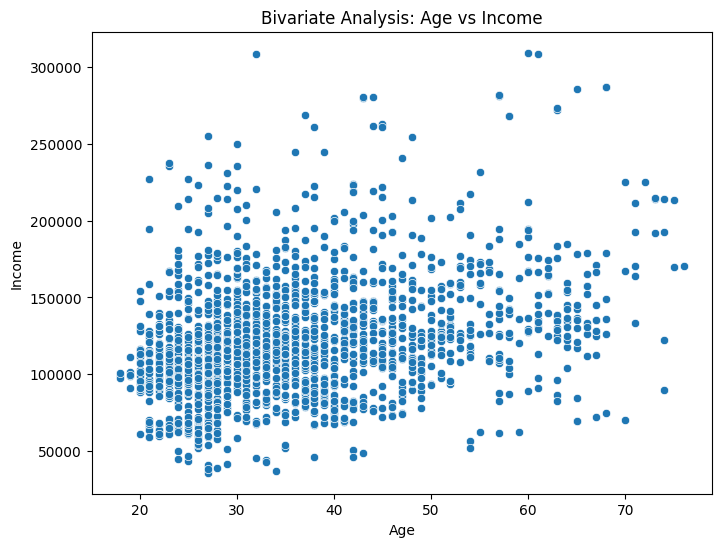

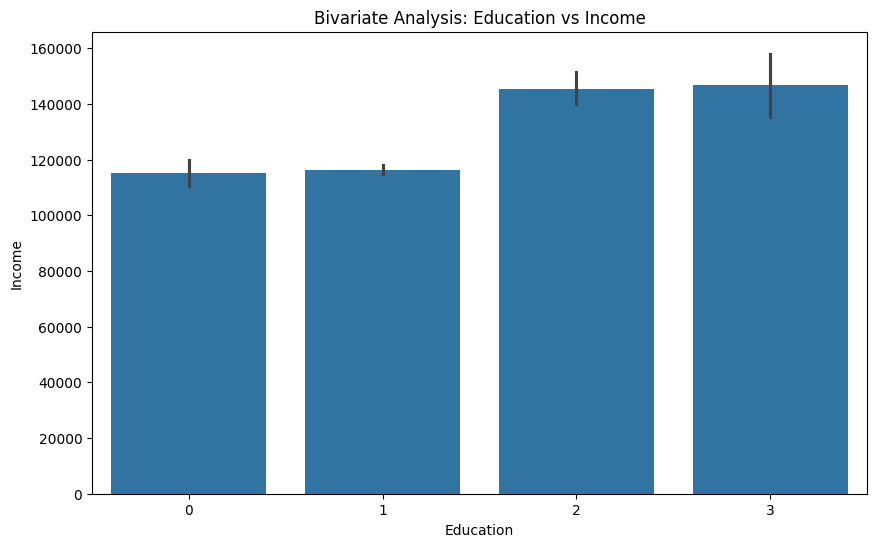

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Income', data=train)
plt.title('Bivariate Analysis: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Income', data=train)
plt.title('Bivariate Analysis: Education vs Income')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()



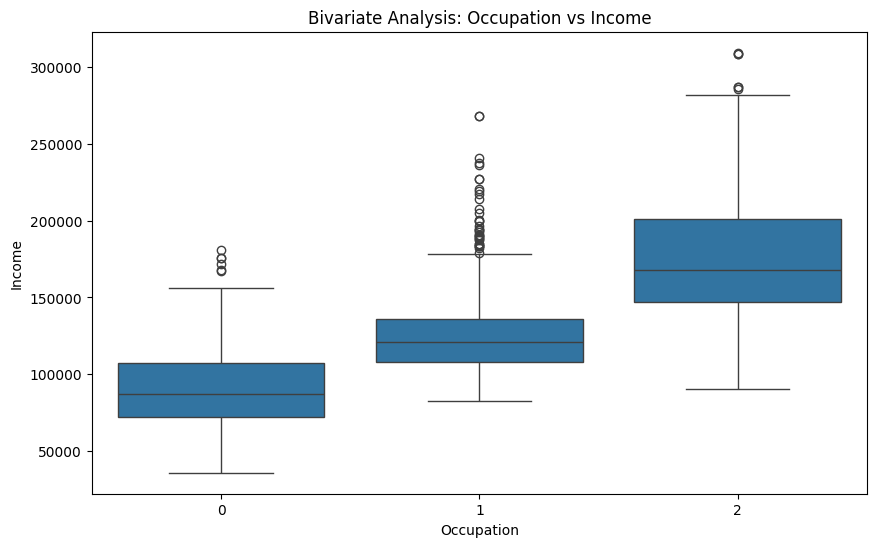

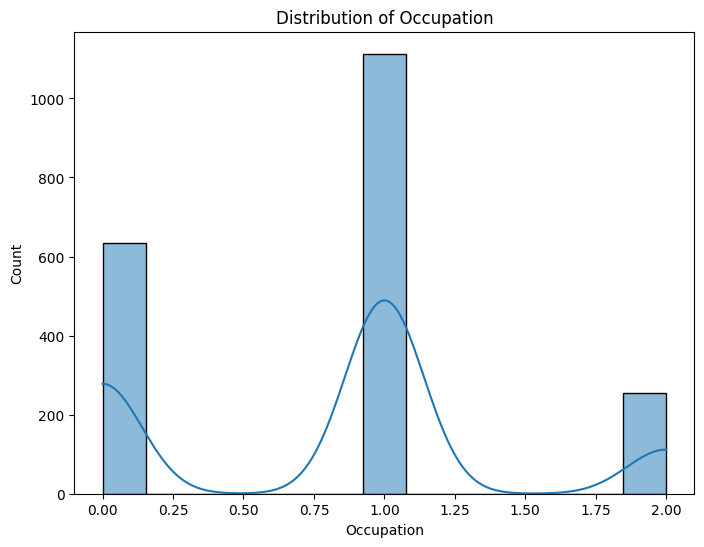

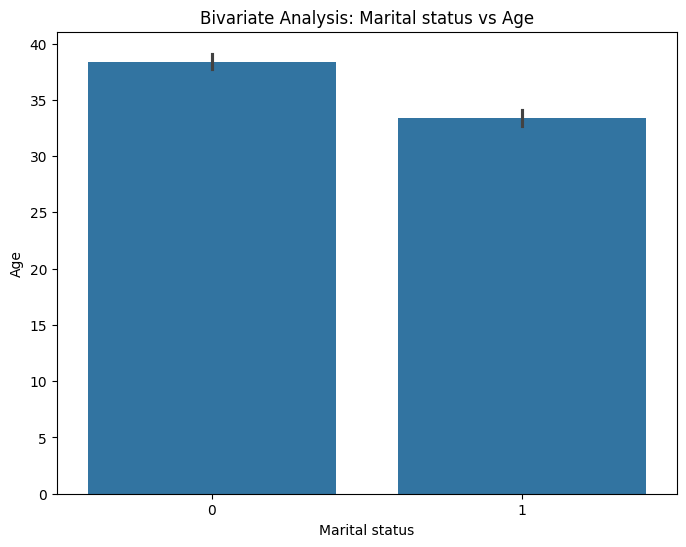

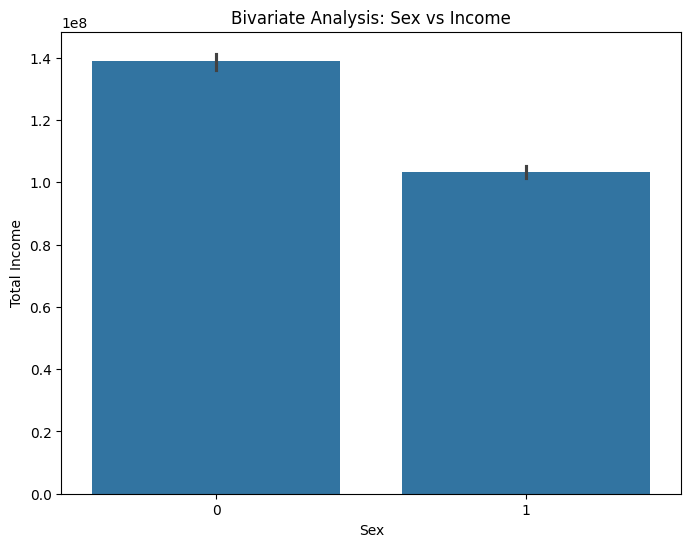

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Income', data=train)
plt.title('Bivariate Analysis: Occupation vs Income')
plt.xlabel('Occupation')
plt.ylabel('Income')
plt.show()



plt.figure(figsize=(8, 6))
sns.histplot(train['Occupation'], kde=True)
plt.title('Distribution of Occupation')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Marital status', y='Age', data=train)
plt.title('Bivariate Analysis: Marital status vs Age')
plt.xlabel('Marital status')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Income', data=train, estimator=sum)
plt.title('Bivariate Analysis: Sex vs Income')
plt.xlabel('Sex')
plt.ylabel('Total Income')
plt.show()



### **ADDITIONAL EDA**

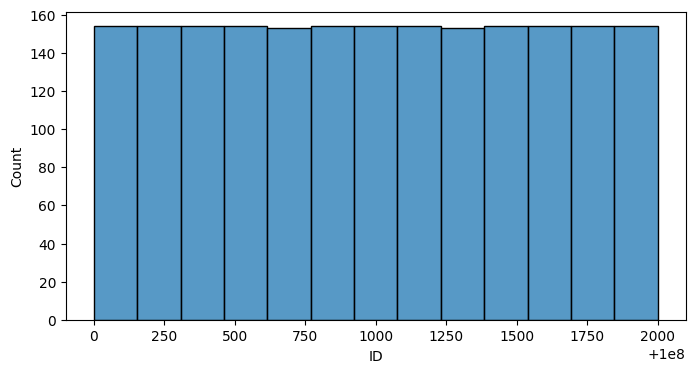

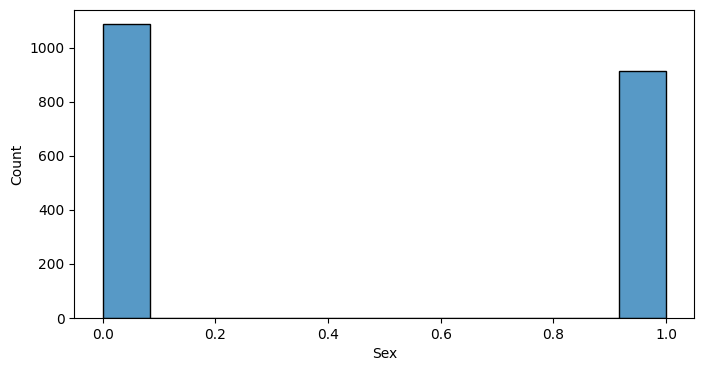

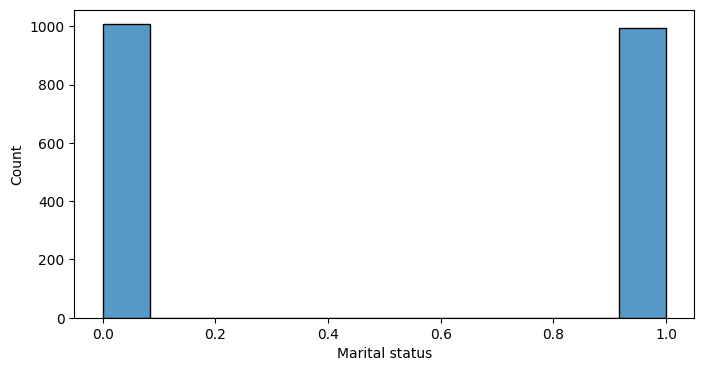

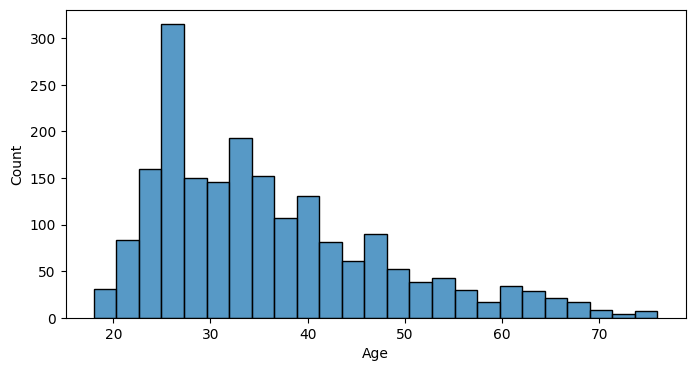

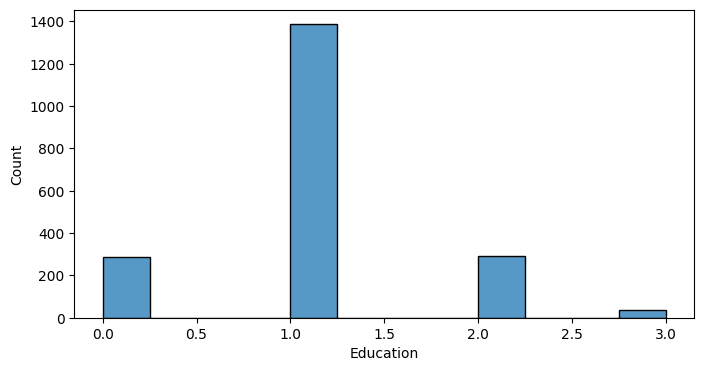

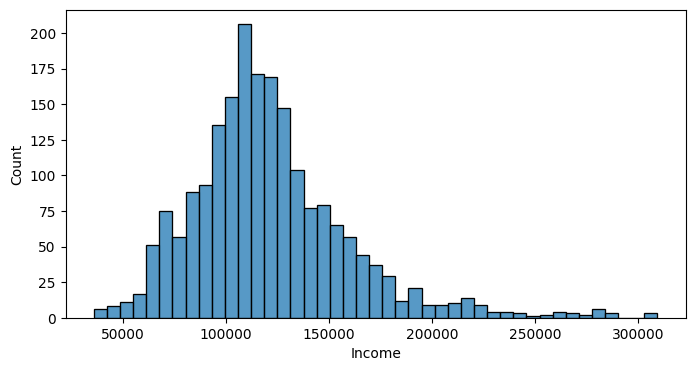

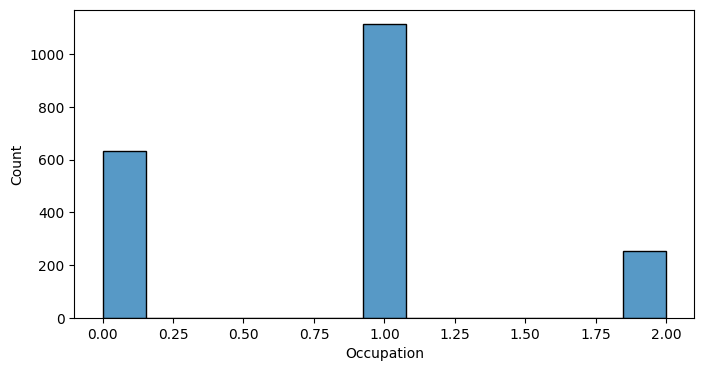

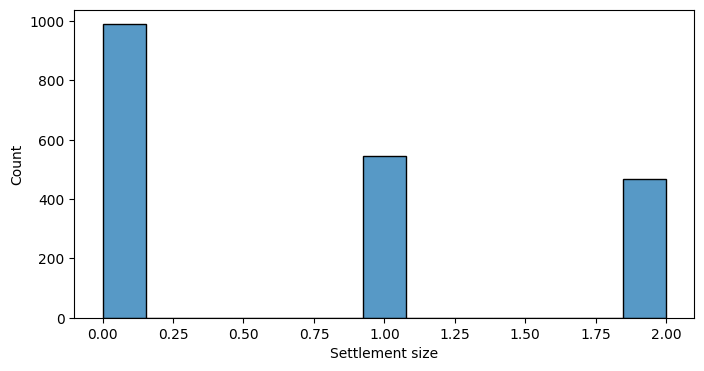

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/TASK 7 data set/segmentation data.csv')
# Given column names
column_names = ['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']

for column_name in column_names:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=train, x=column_name)
    plt.savefig(column_name + '_histogram.png')

plt.show()  # Added to display the plots if needed
  # Added to display the plots if needed




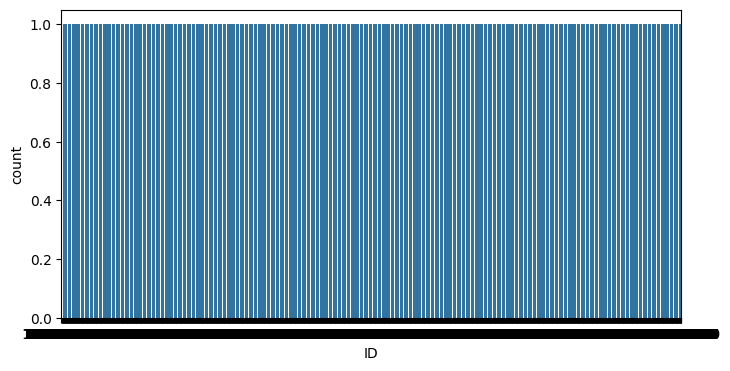

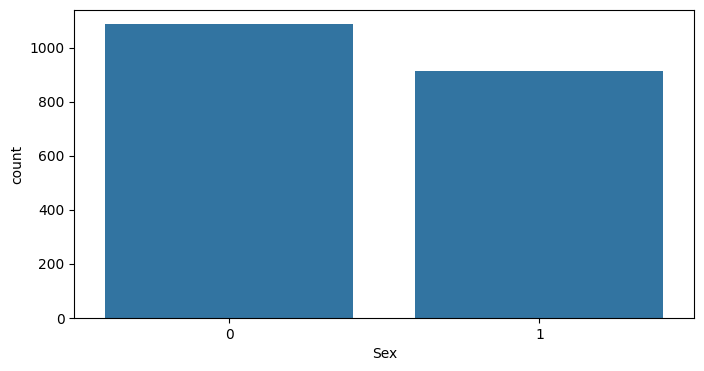

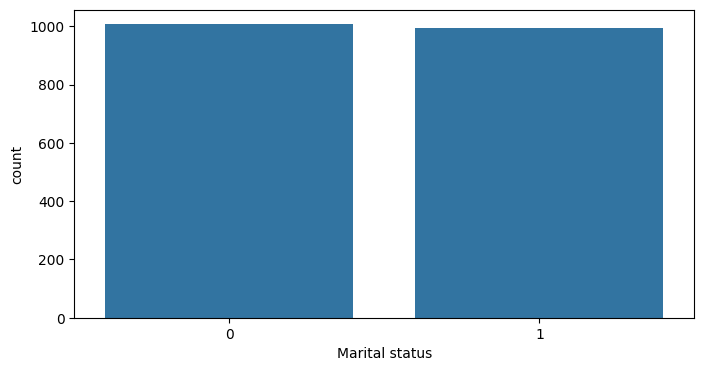

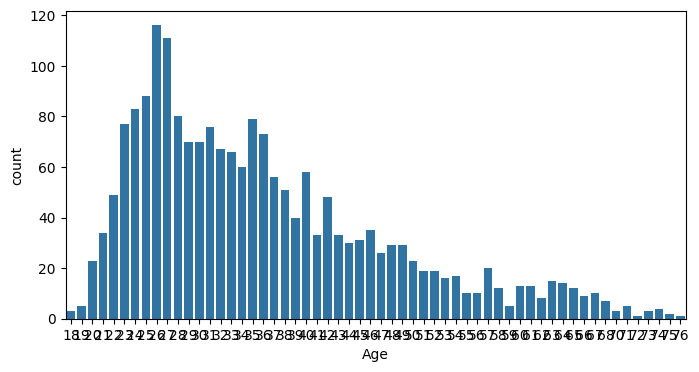

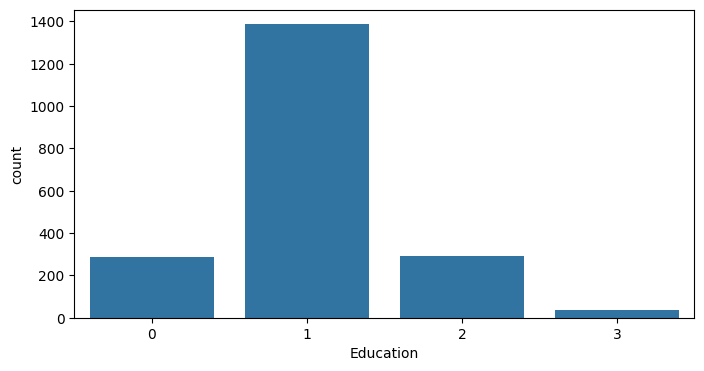

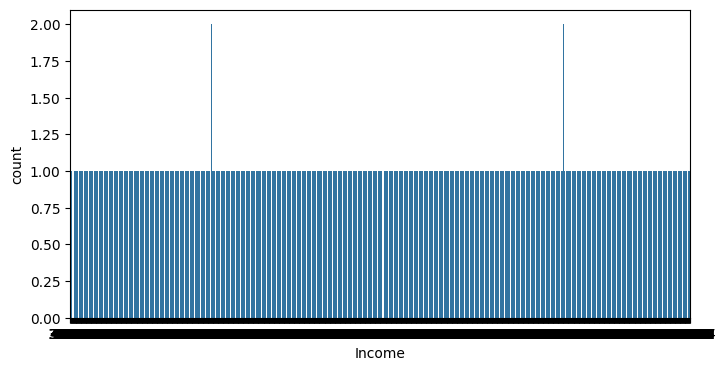

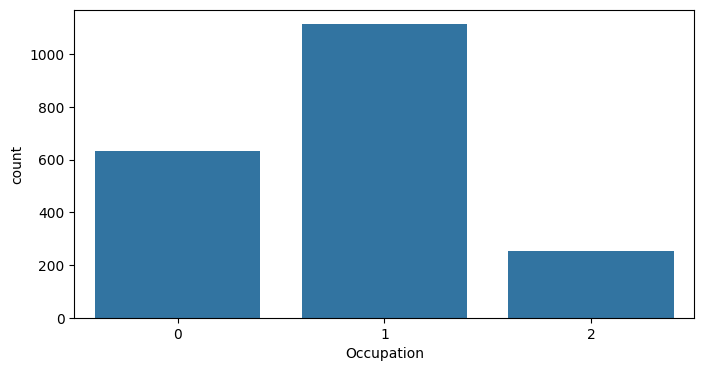

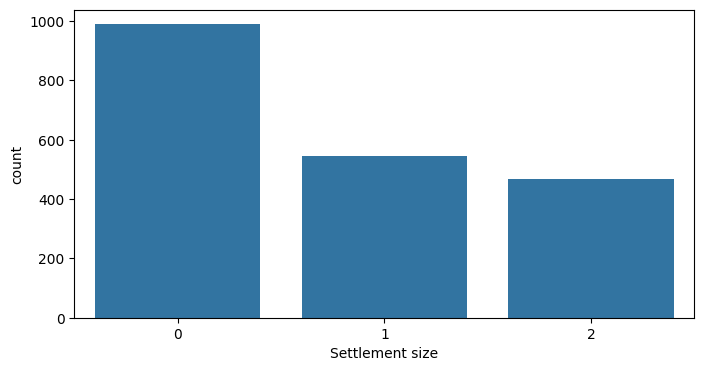

In [ ]:
for category in column_names:
    plt.figure(figsize=(8,4))
    sns.countplot(data=train, x=category)

<Axes: xlabel='Age', ylabel='Income'>

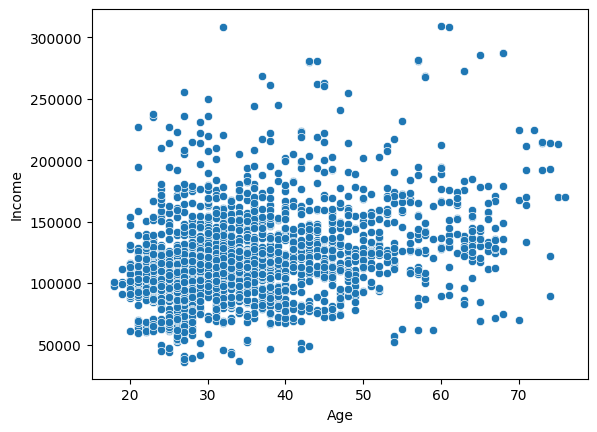

In [ ]:
sns.scatterplot(x='Age', y='Income', data=train)

### **K-MEANS** **CLUSTERING**

In [ ]:
from sklearn.cluster import KMeans

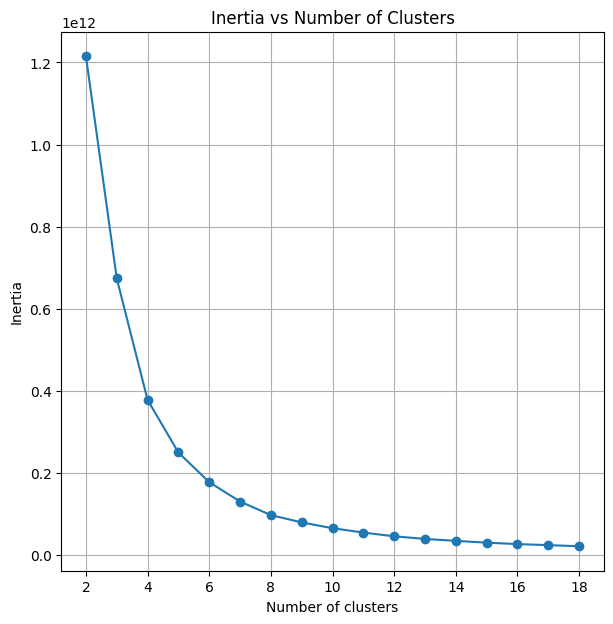

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting the specified columns for clustering
X = train[['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]

clusters_range = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
inertias = []

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7, 7))
plt.plot(clusters_range, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

In [ ]:
kmeans=KMeans(n_clusters=6, random_state=0).fit(X)

In [ ]:
labels = kmeans.labels_
X_pca_df['Labels'] = labels

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
X_pca_df.head()

,X1,X2,X3,Labels
0,3720.138522,982.401288,31.114352,2
1,29822.853391,861.455999,-16.686993,5
2,-31739.497908,1143.373680,16.885139,0
3,50614.626906,763.891542,4.099911,5
4,28080.861251,866.449291,14.495775,5


In [ ]:
X_pca_df['Labels'] = X_pca_df['Labels'].astype(str)

In [ ]:
results_df = train.drop(['ID'], axis=1)
results_df['Labels'] = kmeans.labels_
results_df = results_df.astype({'Sex':'int32', 'Marital status':'int32', 'Education':'int32', 'Occupation':'int32', 'Settlement size':'int32'})
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int32
 1   Marital status   2000 non-null   int32
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int32
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int32
 6   Settlement size  2000 non-null   int32
 7   Labels           2000 non-null   int32
dtypes: int32(6), int64(2)
memory usage: 78.2 KB


In [ ]:
summary = {}

for index in range(6):
    summary[index] = results_df[results_df['Labels'] == index].describe()

In [ ]:
summary[0]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.0
mean,0.559271,0.571429,32.034954,0.942249,103156.361702,0.703647,0.563830,0.0
std,0.496852,0.495248,9.374355,0.447903,7437.790591,0.495353,0.754307,0.0
min,0.000000,0.000000,18.000000,0.000000,87964.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,25.000000,1.000000,97379.500000,0.000000,0.000000,0.0
50%,1.000000,1.000000,29.000000,1.000000,104158.500000,1.000000,0.000000,0.0
75%,1.000000,1.000000,37.000000,1.000000,109268.000000,1.000000,1.000000,0.0
max,1.000000,1.000000,74.000000,2.000000,115026.000000,2.000000,2.000000,0.0


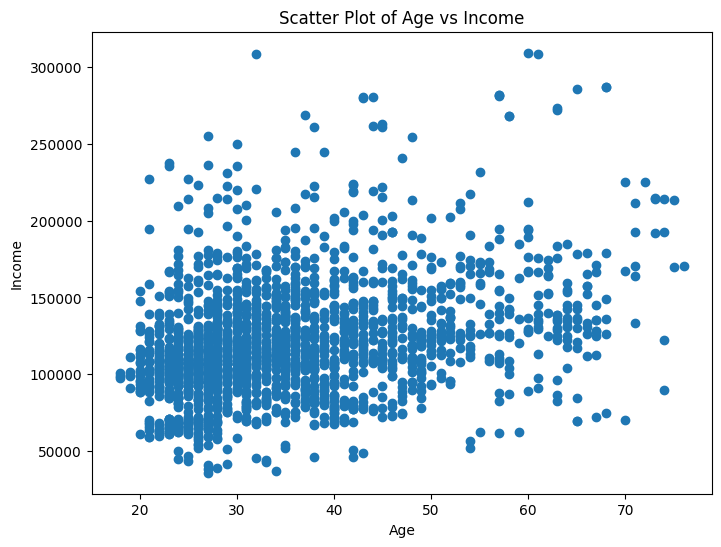

In [ ]:
import matplotlib.pyplot as plt

# Assuming df contains your DataFrame with the provided column names
# Replace df with the name of your DataFrame if it's different
# Assuming you want to plot 'Age' against 'Income'
plt.figure(figsize=(8, 6))
plt.scatter(train['Age'], train['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot of Age vs Income')
plt.show()



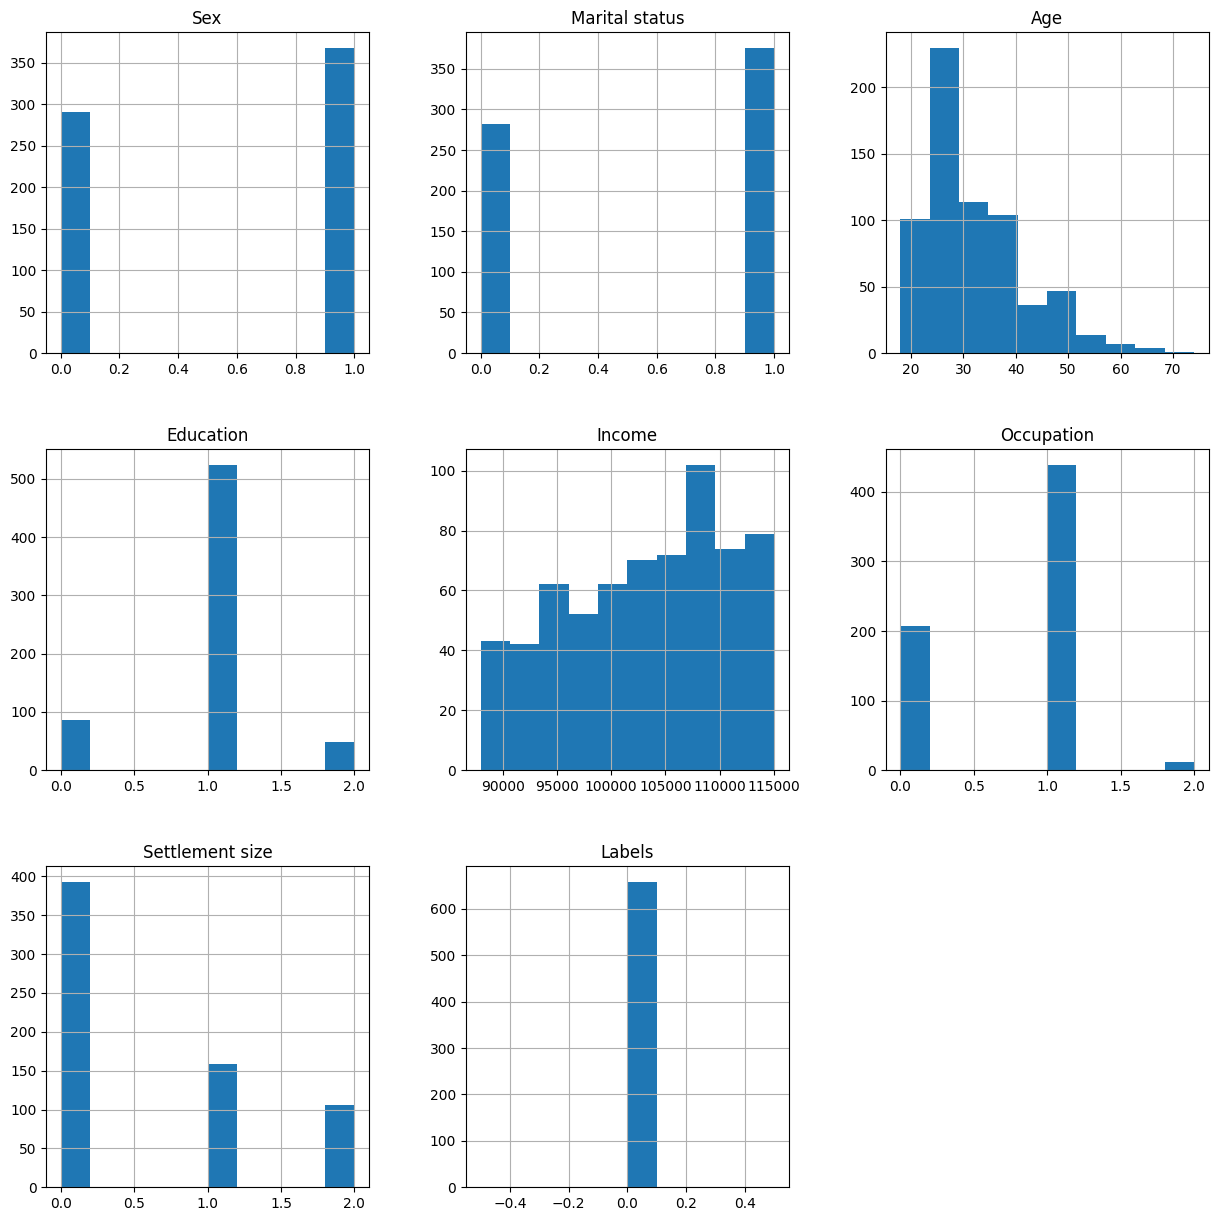

In [ ]:
results_df[results_df['Labels'] == 0].hist(figsize=(15,15));

In [ ]:
summary[3]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0
mean,0.259259,0.370370,49.370370,1.592593,272544.222222,1.888889,1.629630,3.0
std,0.446576,0.492103,12.108955,0.636049,18793.029414,0.320256,0.492103,0.0
min,0.000000,0.000000,27.000000,0.000000,241068.000000,1.000000,1.000000,3.0
25%,0.000000,0.000000,41.000000,1.000000,260912.000000,2.000000,1.000000,3.0
50%,0.000000,0.000000,47.000000,2.000000,272314.000000,2.000000,2.000000,3.0
75%,0.500000,1.000000,59.000000,2.000000,281785.000000,2.000000,2.000000,3.0
max,1.000000,1.000000,68.000000,2.000000,309364.000000,2.000000,2.000000,3.0


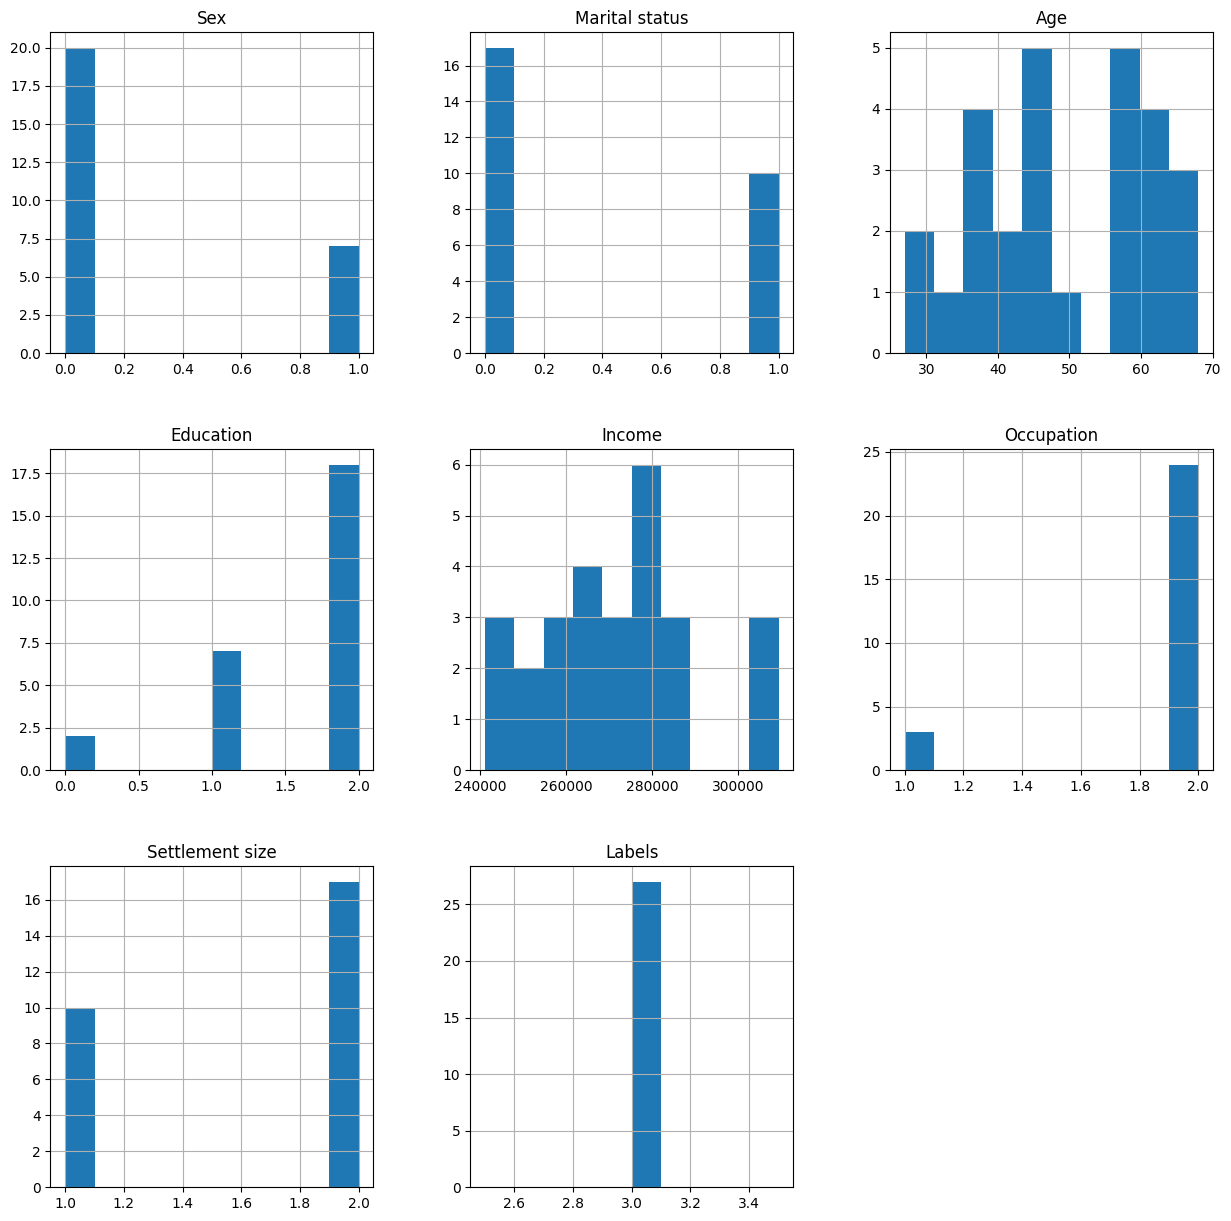

In [ ]:
results_df[results_df['Labels'] == 3].hist(figsize=(15,15));

In [ ]:
summary[1]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
count,93.000000,93.000000,93.000000,93.00000,93.000000,93.000000,93.000000,93.0
mean,0.301075,0.397849,43.559140,1.27957,204878.311828,1.666667,1.397849,1.0
std,0.461212,0.492107,14.655806,0.77130,15162.151863,0.473960,0.645044,0.0
min,0.000000,0.000000,21.000000,0.00000,181926.000000,1.000000,0.000000,1.0
25%,0.000000,0.000000,31.000000,1.00000,192451.000000,1.000000,1.000000,1.0
50%,0.000000,0.000000,42.000000,1.00000,202997.000000,2.000000,1.000000,1.0
75%,1.000000,1.000000,53.000000,2.00000,215639.000000,2.000000,2.000000,1.0
max,1.000000,1.000000,75.000000,3.00000,237799.000000,2.000000,2.000000,1.0


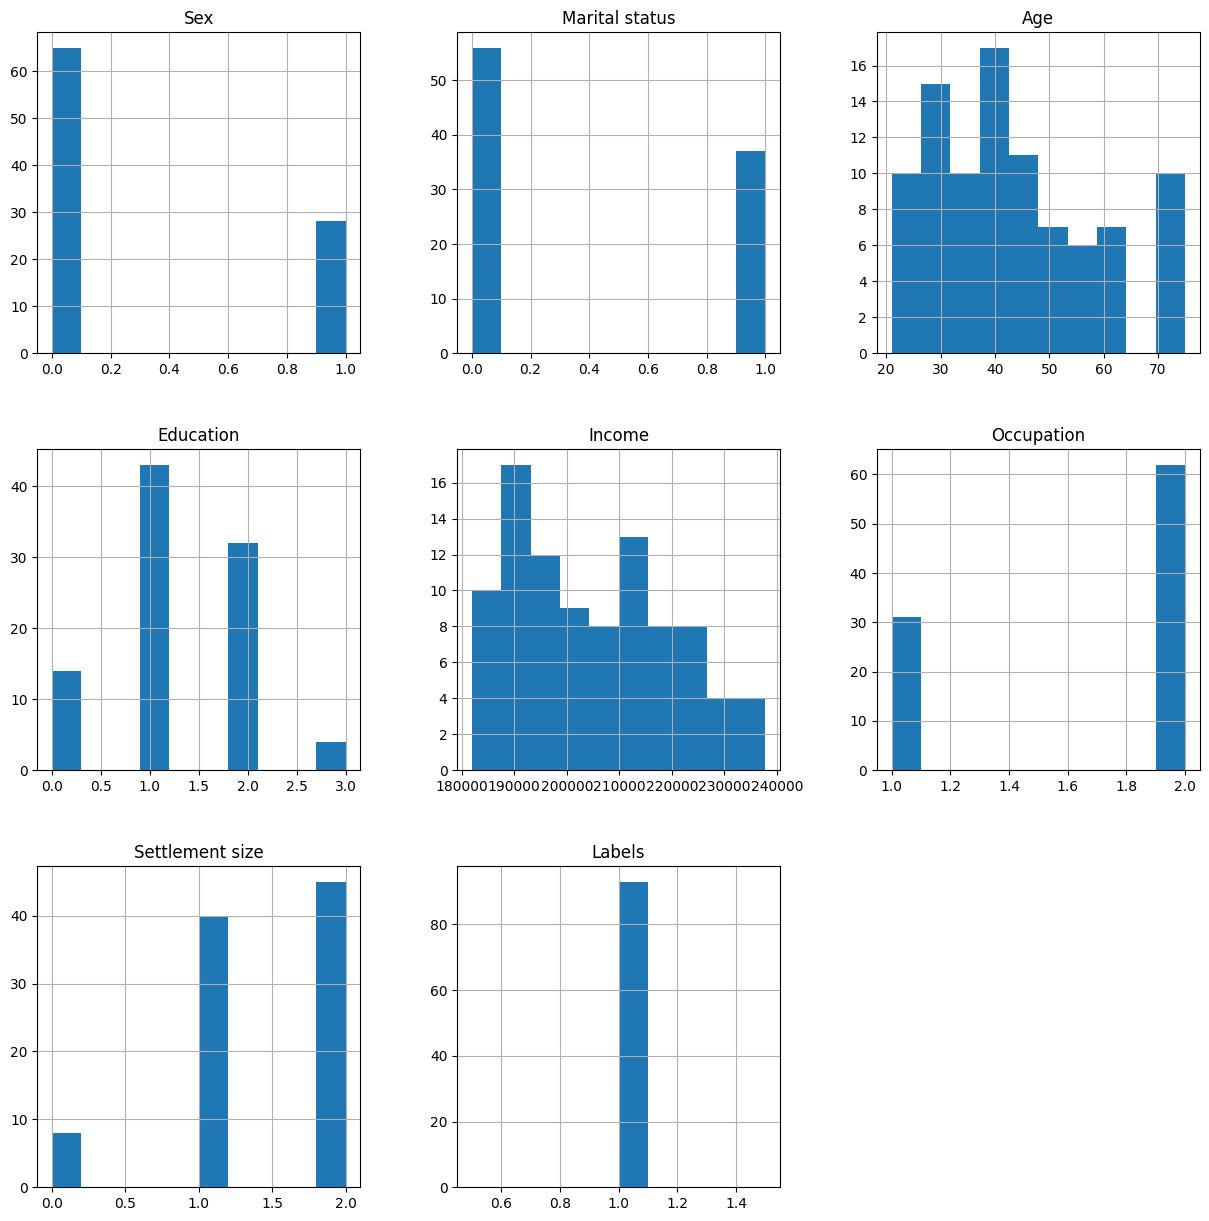

In [ ]:
results_df[results_df['Labels'] == 1].hist(figsize=(15,15));

In [ ]:
summary[2]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.0
mean,0.425829,0.462478,37.699825,1.092496,127009.020942,0.912740,0.900524,2.0
std,0.494900,0.499026,11.903191,0.614649,7535.278910,0.449625,0.818631,0.0
min,0.000000,0.000000,20.000000,0.000000,115075.000000,0.000000,0.000000,2.0
25%,0.000000,0.000000,28.000000,1.000000,121038.000000,1.000000,0.000000,2.0
50%,0.000000,0.000000,35.000000,1.000000,125883.000000,1.000000,1.000000,2.0
75%,1.000000,1.000000,45.000000,1.000000,133265.000000,1.000000,2.000000,2.0
max,1.000000,1.000000,74.000000,3.000000,142438.000000,2.000000,2.000000,2.0


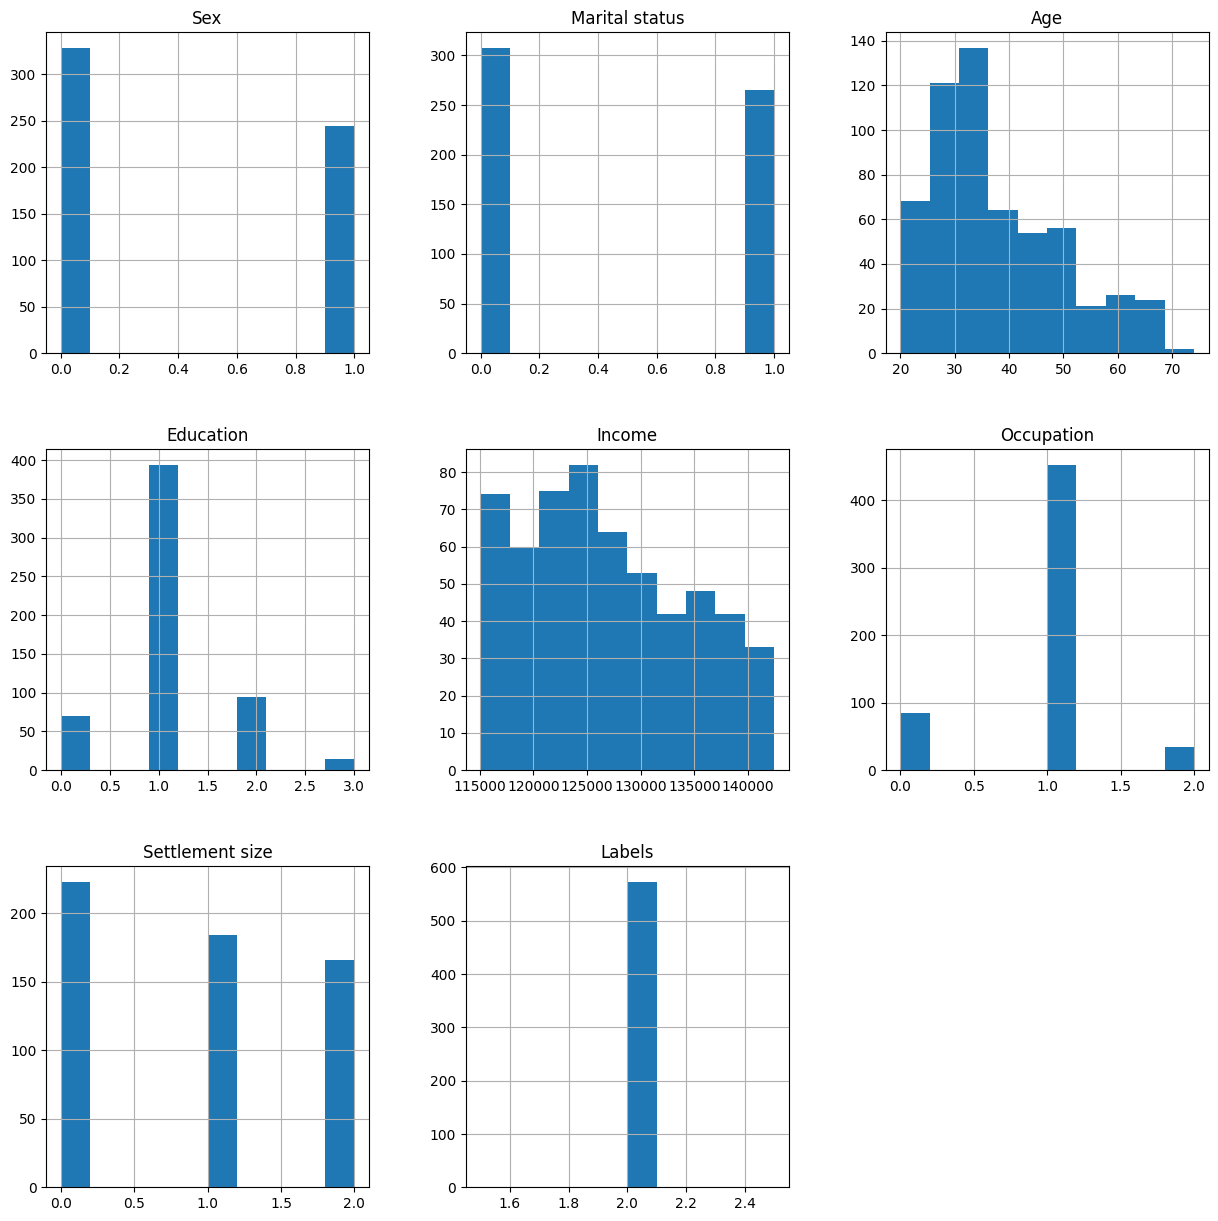

In [ ]:
results_df[results_df['Labels'] == 2].hist(figsize=(15,15));
plt.savefig('cluster4_results')

In [ ]:
from scipy.stats import ttest_ind
import numpy as np

age_cluster_0 = results_df[results_df['Labels'] == 0]['Age']
age_cluster_1 = results_df[results_df['Labels'] == 1]['Age']
age_cluster_2 = results_df[results_df['Labels'] == 2]['Age']
age_cluster_3 = results_df[results_df['Labels'] == 3]['Age']

first_clusters  = [1, 2]
second_clusters = [0, 3]
real_clusters = [age_cluster_0, age_cluster_1, age_cluster_2, age_cluster_3]

for num_clust_1 in first_clusters:
    for num_clust_2 in second_clusters:
        ttest,pval = ttest_ind(real_clusters[num_clust_1], real_clusters[num_clust_2])
        print(f'p-value of {num_clust_1} vs {num_clust_2} is:',pval)
        if pval <0.05:
            print("we reject null hypothesis")
        else:
            print("we accept null hypothesis")


p-value of 1 vs 0 is: 4.5411683198909944e-23
we reject null hypothesis
p-value of 1 vs 3 is: 0.06247013620208603
we accept null hypothesis
p-value of 2 vs 0 is: 4.7918006077865994e-20
we reject null hypothesis
p-value of 2 vs 3 is: 8.54568228423481e-07
we reject null hypothesis


In [ ]:
summary[4]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.0
mean,0.553517,0.489297,32.507645,0.877676,72633.525994,0.003058,0.021407,4.0
std,0.497890,0.500652,9.610470,0.578519,11130.978660,0.055300,0.198539,0.0
min,0.000000,0.000000,20.000000,0.000000,35832.000000,0.000000,0.000000,4.0
25%,0.000000,0.000000,25.000000,1.000000,66636.500000,0.000000,0.000000,4.0
50%,1.000000,0.000000,29.000000,1.000000,73265.000000,0.000000,0.000000,4.0
75%,1.000000,1.000000,38.500000,1.000000,81892.500000,0.000000,0.000000,4.0
max,1.000000,1.000000,70.000000,3.000000,87801.000000,1.000000,2.000000,4.0


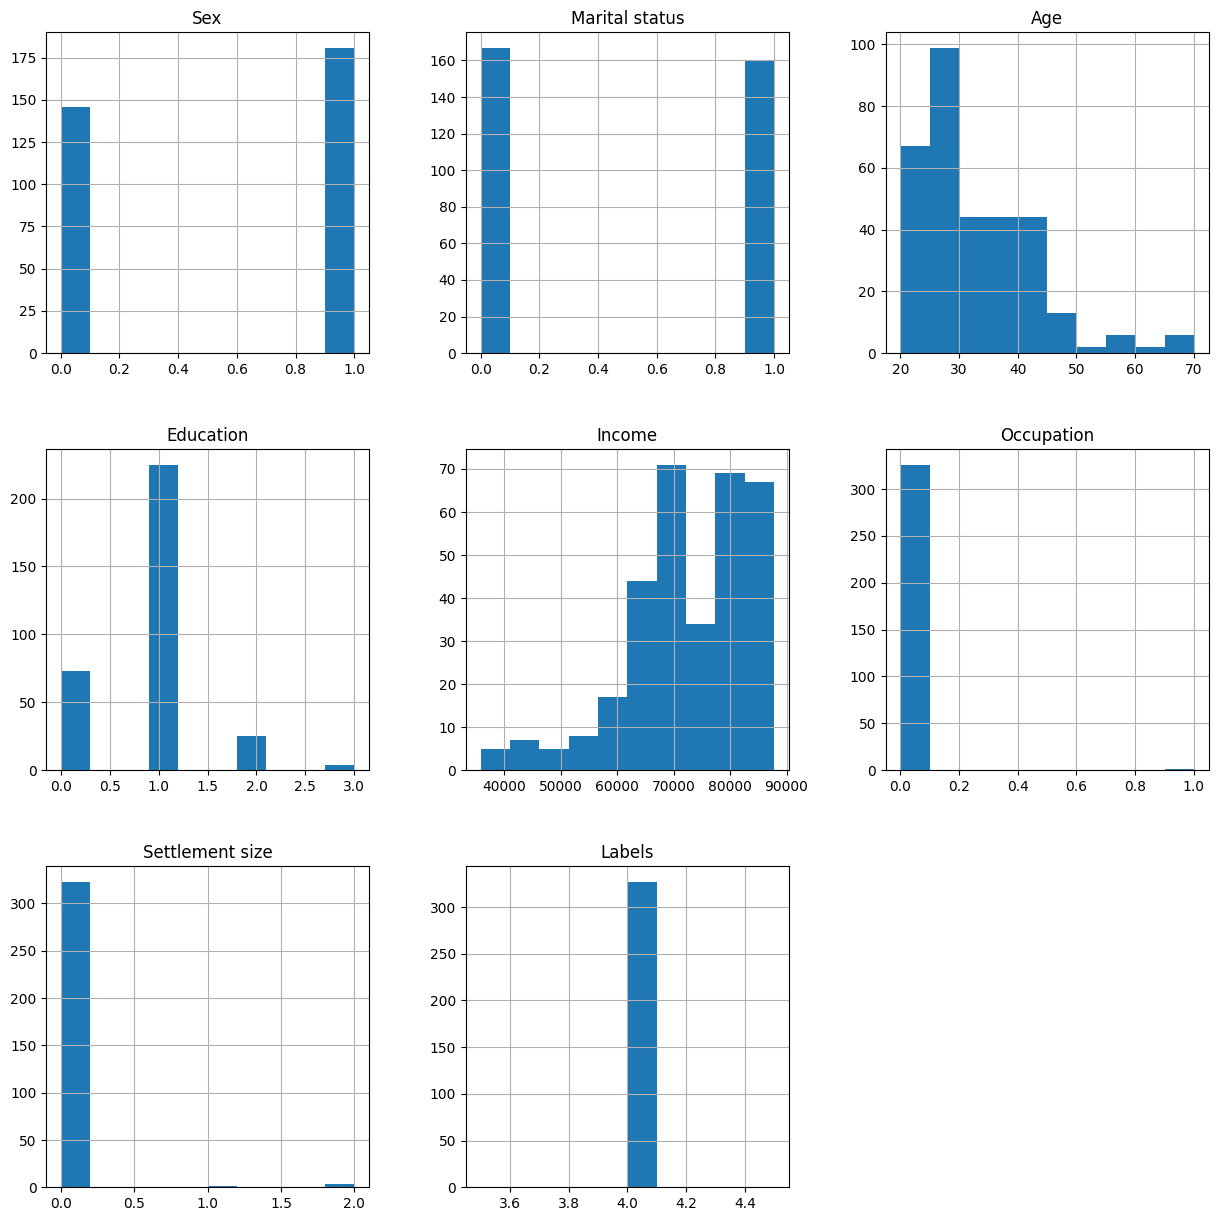

In [ ]:
results_df[results_df['Labels'] == 4].hist(figsize=(15,15));

In [ ]:
summary[5]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.0
mean,0.267081,0.450311,40.754658,1.183230,158671.562112,1.329193,1.273292,5.0
std,0.443123,0.498299,12.316645,0.706422,10746.699178,0.561222,0.678899,0.0
min,0.000000,0.000000,20.000000,0.000000,142870.000000,0.000000,0.000000,5.0
25%,0.000000,0.000000,31.000000,1.000000,149369.500000,1.000000,1.000000,5.0
50%,0.000000,0.000000,37.500000,1.000000,157302.000000,1.000000,1.000000,5.0
75%,1.000000,1.000000,49.000000,2.000000,167705.250000,2.000000,2.000000,5.0
max,1.000000,1.000000,76.000000,3.000000,181262.000000,2.000000,2.000000,5.0


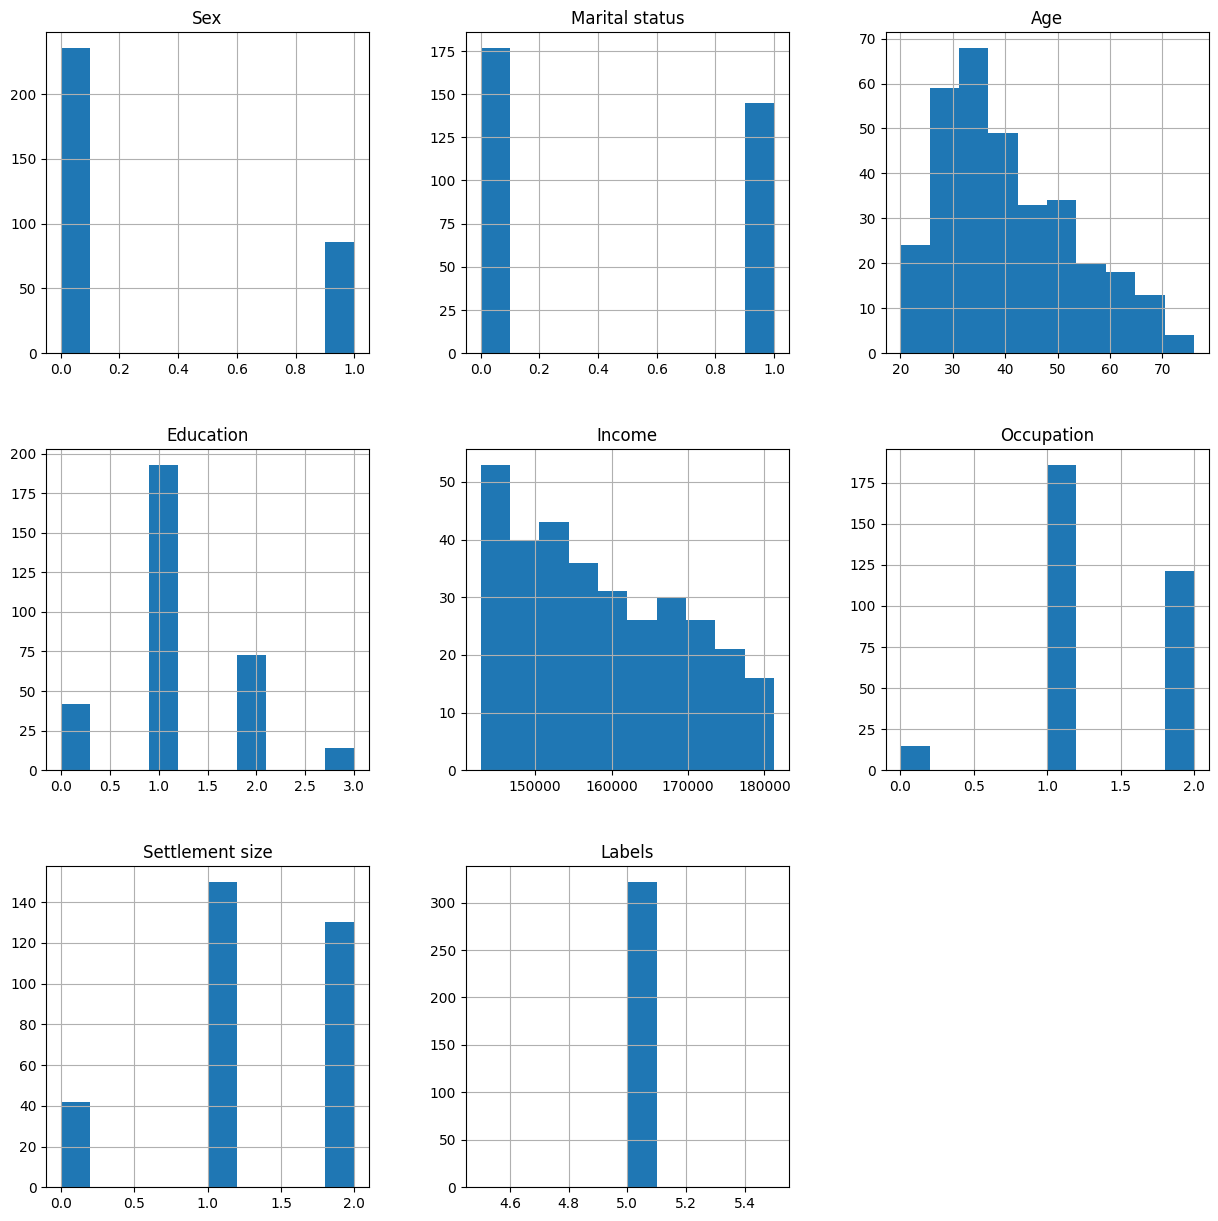

In [ ]:
results_df[results_df['Labels'] == 5].hist(figsize=(15,15));

In [ ]:
import pandas as pd

# Assuming kmeans is your trained KMeans model
# Assuming results_df contains your DataFrame with the provided column names

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Create a DataFrame with centroids
centroids_df = pd.DataFrame(centroids, columns=results_df.columns[:8])

# Print the DataFrame
print(centroids_df)


            Sex  Marital status       Age  Education    Income     Occupation  \
0  1.000011e+08        0.559451  0.571646  32.015244  0.942073  103120.217988   
1  1.000006e+08        0.301075  0.397849  43.559140  1.279570  204878.311828   
2  1.000009e+08        0.426087  0.462609  37.702609  1.092174  126967.290435   
3  1.000007e+08        0.259259  0.370370  49.370370  1.592593  272544.222222   
4  1.000013e+08        0.553517  0.489297  32.507645  0.877676   72633.525994   
5  1.000007e+08        0.267081  0.450311  40.754658  1.183230  158671.562112   

   Settlement size    Labels  
0         0.702744  0.564024  
1         1.666667  1.397849  
2         0.913043  0.899130  
3         1.888889  1.629630  
4         0.003058  0.021407  
5         1.329193  1.273292  


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

###  **ADDITIONAL K MEANS**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/TASK 7 data set/segmentation data.csv')
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


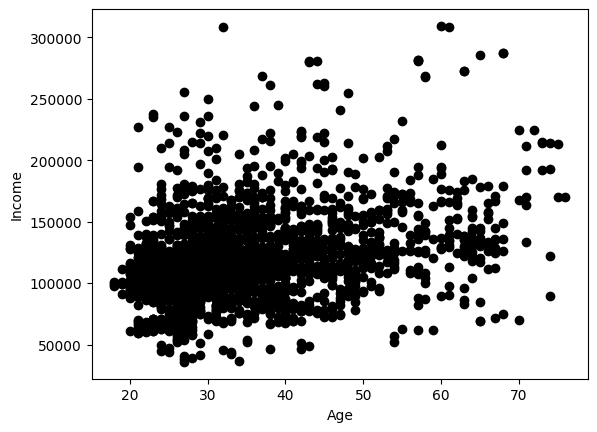

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/TASK 7 data set/segmentation data.csv')
data.head()


X = data[["Age","Income"]]
#Visualise data points
plt.scatter(X["Age"],X["Income"],c='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

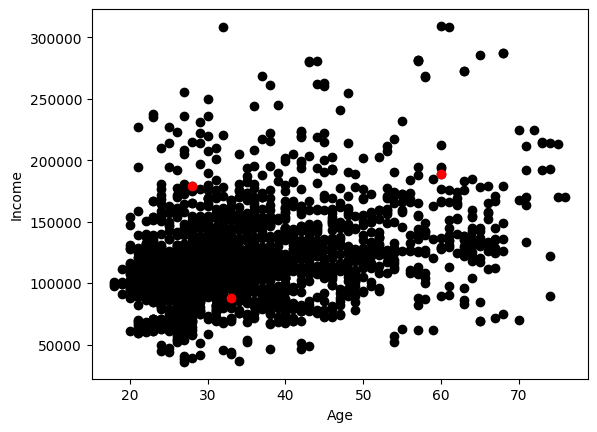

In [ ]:
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Age"],X["Income"],c='black')
plt.scatter(Centroids["Age"],Centroids["Income"],c='red')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Initialize KMeans object with desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fit KMeans to your data
kmeans.fit(X[['Age', 'Income']])

# Access the cluster centroids
centroids = kmeans.cluster_centers_

# Access the cluster labels assigned to each data point
cluster_labels = kmeans.labels_


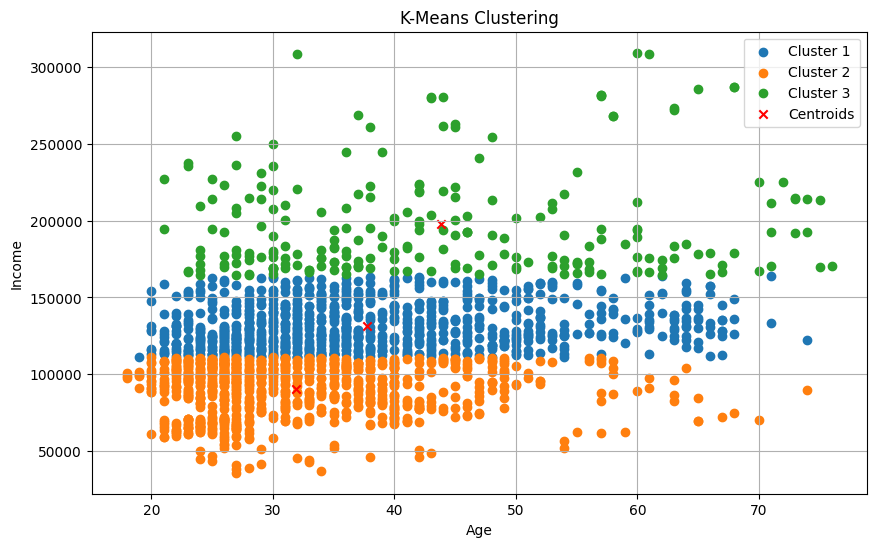

In [ ]:
import matplotlib.pyplot as plt

# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):  # Assuming you have 3 clusters
    cluster_data = X[cluster_labels == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Income'], label=f'Cluster {cluster+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()


          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  
ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


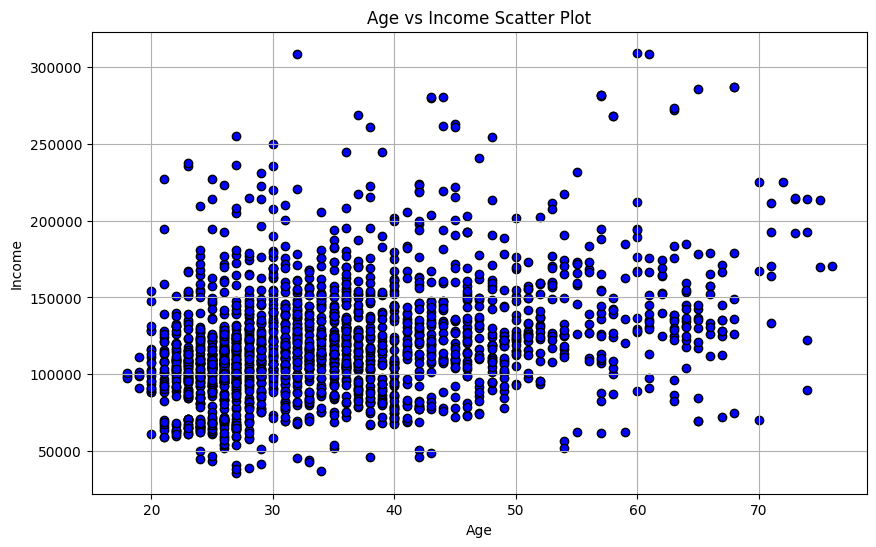

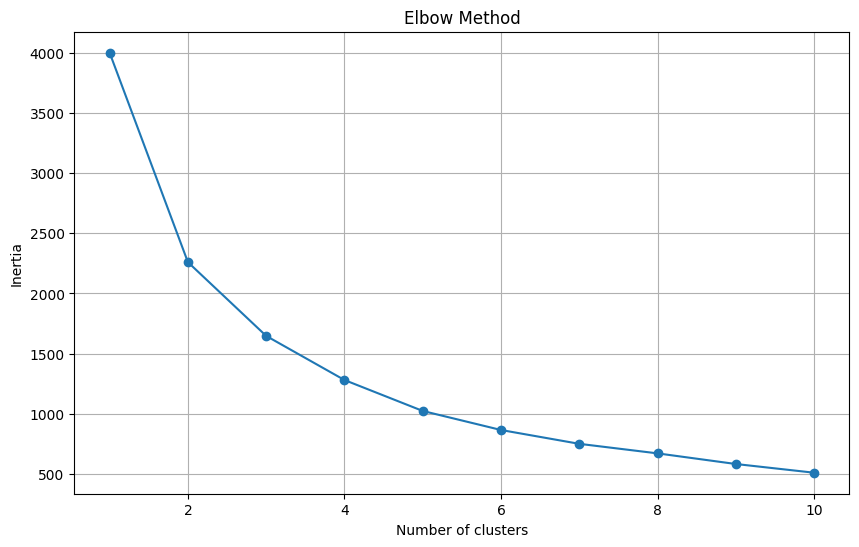

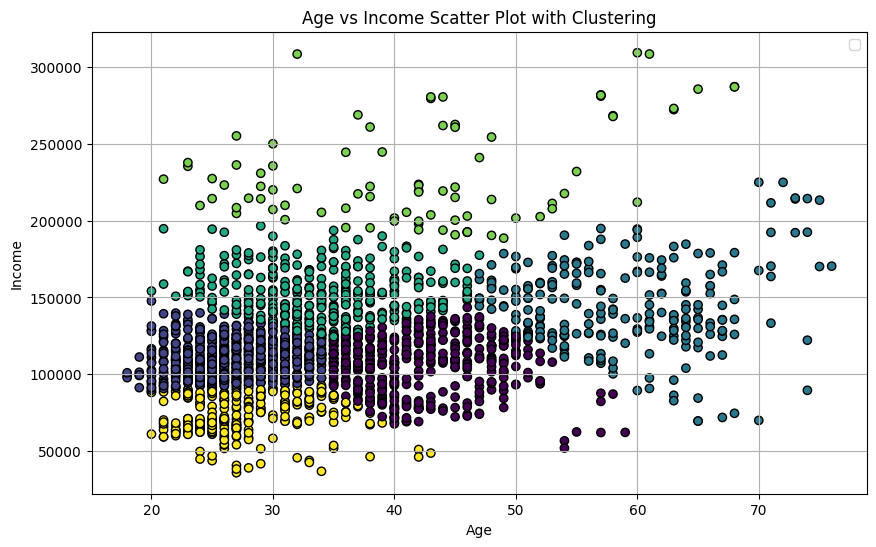

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Step 2: Load dataset
# Assuming your dataset is named 'data.csv', you would load it like this:
data = pd.read_csv('/content/drive/MyDrive/TASK 7 data set/segmentation data.csv')

# Step 3: Exploratory Data Analysis (EDA)
# Check the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Step 4: Visualize age vs income scatter plot without clustering
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Income'], c='blue', marker='o', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income Scatter Plot')
plt.grid(True)
plt.show()

# Step 5: Implement K-Means clustering and find optimal K using the elbow method
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Income']])

# Elbow Method to find optimal K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Step 6: Visualize age vs income scatter plot with clustering
# Using K = 6 based on the elbow method
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_scaled)

# Get centroids
centroids = kmeans.cluster_centers_

# Plotting clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Income'], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='black')
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income Scatter Plot with Clustering')
plt.legend()
plt.grid(True)
plt.show()


### **K MEANS MEDIOSIS**

In [ ]:
!pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.4 MB/s eta 0:00:00


          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  
ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


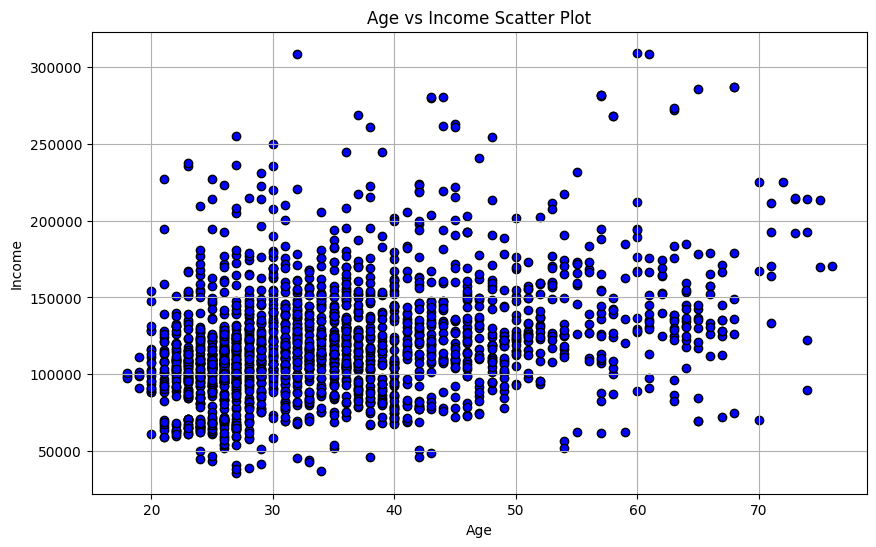

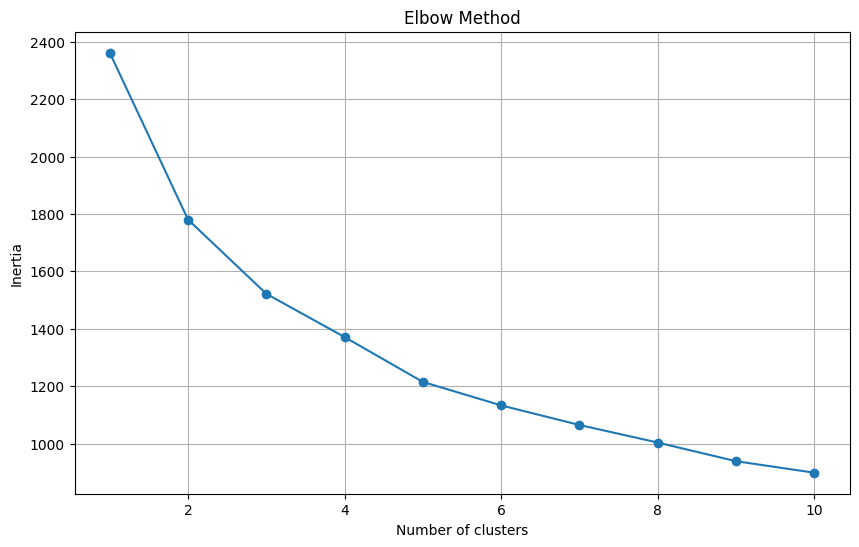

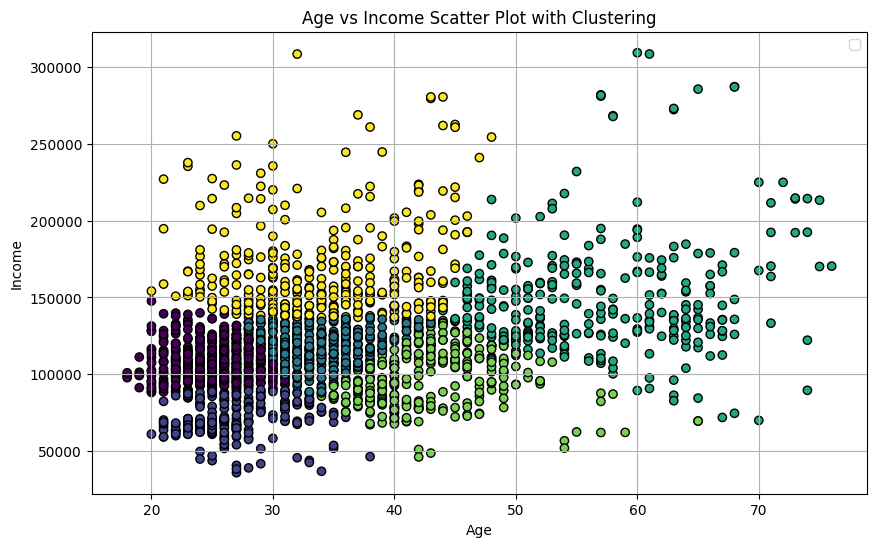

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

# Step 2: Load dataset
data = pd.read_csv('/content/drive/MyDrive/TASK 7 data set/segmentation data.csv')  # Replace 'your_dataset.csv' with your actual dataset filename

# Step 3: Exploratory Data Analysis (EDA)
print(data.head())  # Check the first few rows of the dataset
print(data.isnull().sum())  # Check for missing values

# Step 4: Plot age vs income scatter plot without clustering
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Income'], c='blue', marker='o', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income Scatter Plot')
plt.grid(True)
plt.show()

# Step 5: Implement K-Medoids clustering and find optimal K with the elbow method
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Income']])

# Elbow Method to find optimal K
inertia = []
for k in range(1, 11):
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(data_scaled)
    inertia.append(kmedoids.inertia_)

# Plotting Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Step 6: Visualize age vs income scatter plot with clustering
# Using K = 6 based on the elbow method
kmedoids = KMedoids(n_clusters=6, random_state=42)
kmedoids.fit(data_scaled)

# Get centroids
centroids = kmedoids.cluster_centers_

# Plotting clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Income'], c=kmedoids.labels_, cmap='viridis', marker='o', edgecolor='black')
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income Scatter Plot with Clustering')
plt.legend()
plt.grid(True)
plt.show()

